In [1]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
# After executing the cell above, Drive
# files will be present in "/content/drive/My Drive".
!ls "/content/drive/My Drive/Colab Notebooks"

 data.json				  ImgData
'Image_Processing_Prj_CNN (1).ipynb'	  Untitled0.ipynb
 Image_Processing_Prj_CNN.ipynb		  Untitled1.ipynb
 Image_Processing_Prj_Resnet_3Feb.ipynb   Untitled2.ipynb
 Image_Processing_Prj_VGG16_Final.ipynb


In [0]:
import numpy as np
import pandas as pd

import cv2
import json
#from pprint import pprint


#%matplotlib inline 

#np.set_printoptions(threshold=sys.maxsize)


In [0]:
import os,sys

import matplotlib.pyplot as plt
%matplotlib inline
#from PIL import Image


!pip install tensorflow==1.12.0

!pip install keras==2.1.6


In [5]:
from keras import backend as K
K.set_image_dim_ordering('tf') # execute tensorflow as backend
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils #one hot encoding

Using TensorFlow backend.


In [0]:
#packages for cnn

from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
#to avoid overfitting include dropout
from keras.layers import Dropout
#to flatten maxpool layer o/p
from keras.layers import Flatten

In [0]:
from IPython.display import display 
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn import metrics

## Setting up Parameters

In [0]:
IMG_SIZE_FINAL = 150
num_classes = 0  # will take dynamically 
IMG_PATH = '/content/drive/My Drive/Colab Notebooks/ImgData/10Catg500imgs/'

In [0]:
#train_df = pd.read_json("C:\\GreatLakes\\Capstone\\Data\\train-SML.json")
temp_df= pd.read_json(IMG_PATH+"JSON/data.json")

In [10]:
temp_df.head()

,image
0,"{'image_id': 1, 'image_label': 'hot_pot', 'ima..."
1,"{'image_id': 2, 'image_label': 'hot_pot', 'ima..."
2,"{'image_id': 3, 'image_label': 'hot_pot', 'ima..."
3,"{'image_id': 4, 'image_label': 'hot_pot', 'ima..."
4,"{'image_id': 5, 'image_label': 'hot_pot', 'ima..."


In [0]:
train_df=pd.DataFrame([(temp_df.image[i]['image_id'],temp_df.image[i]['image_name'],temp_df.image[i]['image_label']) for i in  
              range(len(temp_df))], columns=['image_id','image_name','label_id'])

In [12]:
train_df.shape

(5132, 3)

In [13]:
train_df.head(10)

,image_id,image_name,label_id
0,1,image_id_1__57171f60N523c940e.jpg,hot_pot
1,2,image_id_2__T1pFCtFbVcXXXXXXXX_%21%210-item_pi...,hot_pot
2,3,image_id_3__59b25f42N52ee2b0c.jpg,hot_pot
3,4,image_id_4__TB2SJwwdxeK.eBjSZFlXXaywXXa_!!2855...,hot_pot
4,5,image_id_5__QQI-390870207-1.jpg,hot_pot
5,6,image_id_6__TB1HoBuHFXXXXXOXFXXXXXXXXXX_!!0-it...,hot_pot
6,7,image_id_7__6016537.jpg,hot_pot
7,8,image_id_8__5672f5e9N7dfa5a0e.jpg%21q70.jpg,hot_pot
8,9,image_id_9__683fc19f3fbdeaeb6af8bdee95ca5fd0.jpg,hot_pot
9,10,image_id_10__75ecb96db31337096ac2a9df85f00663.jpg,hot_pot


In [14]:
train_df[train_df.image_name=='image_id_91920__TB2hW9jmEl7MKJjSZFDXXaOEpXa_!!3031415983.jpg']

,image_id,image_name,label_id
1917,91920,image_id_91920__TB2hW9jmEl7MKJjSZFDXXaOEpXa_!!...,jug


In [15]:
train_df.image_id[0]

1

In [16]:
train_df.image_id[1]

2

In [17]:
train_df.label_id[0]

'hot_pot'

In [18]:
train_df.label_id.value_counts()

dinning_table    519
jug              519
hot_pot          519
office_chair     519
water_filter     519
lamp             519
mirror           516
cooker           502
sofa             500
bowl             500
Name: label_id, dtype: int64

In [0]:
num_classes = train_df.label_id.nunique()

In [20]:
num_classes

10

In [21]:
''''
file_remove = [f for f in os.listdir(IMG_PATH+'GR') if os.path.isfile(IMG_PATH+f)]
for f in file_remove:
    os.remove(IMG_PATH+'GR/'+f)
    
file_remove = [f for f in os.listdir(IMG_PATH+'GR_SML') if os.path.isfile(IMG_PATH+f)]
for f in file_remove:
    os.remove(IMG_PATH+'GR_SML/'+f)
'''

"'\nfile_remove = [f for f in os.listdir(IMG_PATH+'GR') if os.path.isfile(IMG_PATH+f)]\nfor f in file_remove:\n    os.remove(IMG_PATH+'GR/'+f)\n    \nfile_remove = [f for f in os.listdir(IMG_PATH+'GR_SML') if os.path.isfile(IMG_PATH+f)]\nfor f in file_remove:\n    os.remove(IMG_PATH+'GR_SML/'+f)\n"

In [0]:
from PIL import Image


In [23]:

from matplotlib import pyplot as plt
var = 0
label = np.array([])
final_img_files = np.array([])

for im in range(len(train_df)):

    var = var + 1
    if var >= 5500:
        break

    print (train_df.image_name[im] , '                 ' ,  var )
    print (train_df.label_id[im])
    try:
        '''
        #Original Image : Read in numpy array and find shape
        img_array = np.array(cv2.imread( IMG_PATH + train_df.image_name[im] ))
        print("Original  : " , img_array.shape)        
        
        #Use OpenCV to convert the RGB image to GRAYSCALE
        image_gr = cv2.imread( IMG_PATH + train_df.image_name[im] ,cv2.IMREAD_GRAYSCALE)
        #Not really required to write it back
        cv2.imwrite( IMG_PATH + 'GR/' + train_df.image_name[im]   ,image_gr)
       
    
        #Use OpenCV to convert the RGB image to GRAYSCALE
        image_gr = cv2.imread( IMG_PATH + train_df.image_name[im] ,cv2.IMREAD_GRAYSCALE)
        #Not really required to write it back
        cv2.imwrite( IMG_PATH + 'GR/' + train_df.image_name[im]   ,image_gr)

        #Grayscale Image : Read in numpy array and find shape
        img_array = np.array(cv2.imread( IMG_PATH + 'GR/' + train_df.image_name[im] , cv2.IMREAD_GRAYSCALE) )
        print(  "Grayscale  : ", img_array.shape)
        
        image_gr_sml = cv2.resize(image_gr, (int(IMG_SIZE_FINAL) ,int(IMG_SIZE_FINAL)   ))
        #Not really required to write it back
        cv2.imwrite( IMG_PATH + 'GR_SML/' + train_df.image_name[im]   ,image_gr_sml)
        
        
        '''
        #Small Gray Image : Read in numpy array and find shape
        img_array = np.array(Image.open(IMG_PATH + 'GR_SML/' + train_df.image_name[im])  )

        img_array = np.array(cv2.imread( IMG_PATH + 'GR_SML/' + train_df.image_name[im] ))
    #, cv2.IMREAD_GRAYSCALE   
        print( "Small Grayscale  : ", img_array.shape)
        
        final_img_files  = np.append( final_img_files ,   train_df.image_name[im])
        label = np.append(label , train_df.label_id[im] )
        
        #cv2.imshow("Show Small gray image by CV2",image_gr_sml)
        #cv2.waitKey(0)
        
    except:
        print("Exception occured for " + train_df.image_name[im])
        continue
#cv2.destroyAllWindows()


image_id_1__57171f60N523c940e.jpg                   1
hot_pot
Small Grayscale  :  (150, 150, 3)
image_id_2__T1pFCtFbVcXXXXXXXX_%21%210-item_pic.jpg                   2
hot_pot
Exception occured for image_id_2__T1pFCtFbVcXXXXXXXX_%21%210-item_pic.jpg
image_id_3__59b25f42N52ee2b0c.jpg                   3
hot_pot
Small Grayscale  :  (150, 150, 3)
image_id_4__TB2SJwwdxeK.eBjSZFlXXaywXXa_!!2855447419.jpg                   4
hot_pot
Small Grayscale  :  (150, 150, 3)
image_id_5__QQI-390870207-1.jpg                   5
hot_pot
Small Grayscale  :  (150, 150, 3)
image_id_6__TB1HoBuHFXXXXXOXFXXXXXXXXXX_!!0-item_pic.jpg                   6
hot_pot
Small Grayscale  :  (150, 150, 3)
image_id_7__6016537.jpg                   7
hot_pot
Small Grayscale  :  (150, 150, 3)
image_id_8__5672f5e9N7dfa5a0e.jpg%21q70.jpg                   8
hot_pot
Small Grayscale  :  (150, 150, 3)
image_id_9__683fc19f3fbdeaeb6af8bdee95ca5fd0.jpg                   9
hot_pot
Exception occured for image_id_9__683fc19f3fbdeaeb6af

In [24]:
final_img_files

array(['image_id_1__57171f60N523c940e.jpg',
       'image_id_3__59b25f42N52ee2b0c.jpg',
       'image_id_4__TB2SJwwdxeK.eBjSZFlXXaywXXa_!!2855447419.jpg', ...,
       'image_id_137631__593e2305Nad87decd.jpg',
       'image_id_137632__wKhQplb-OH2EG_WJAAAAAKYXeCs188.jpg',
       'image_id_137633__1000098180_400.jpg'], dtype='<U188')

In [25]:
print (label)

['hot_pot' 'hot_pot' 'hot_pot' ... 'water_filter' 'water_filter'
 'water_filter']


In [26]:
label[0]

'hot_pot'

### List of all final small gray processed files

In [27]:
# final_img_files = os.listdir(IMG_PATH+'GR_SML') # stores the file name alone
print(' Length of final_img_files : ' , len(final_img_files) , '  and label : ' , len(label)  )

 Length of final_img_files :  4838   and label :  4838


In [28]:
type(final_img_files)

numpy.ndarray

In [0]:
final_img_files_list = final_img_files.tolist()

In [30]:
final_img_files_list

['image_id_1__57171f60N523c940e.jpg',
 'image_id_3__59b25f42N52ee2b0c.jpg',
 'image_id_4__TB2SJwwdxeK.eBjSZFlXXaywXXa_!!2855447419.jpg',
 'image_id_5__QQI-390870207-1.jpg',
 'image_id_6__TB1HoBuHFXXXXXOXFXXXXXXXXXX_!!0-item_pic.jpg',
 'image_id_7__6016537.jpg',
 'image_id_8__5672f5e9N7dfa5a0e.jpg%21q70.jpg',
 'image_id_10__75ecb96db31337096ac2a9df85f00663.jpg',
 'image_id_11__58429ddeN528837b7.jpg',
 'image_id_12__ChEi21ZD8omAGcyNAAN5x93OdSQ41401_360x360.jpg',
 'image_id_13__55b8393aNf194fd7e.jpg%21q70.jpg',
 'image_id_14__TB2Fl3nbv6H8KJjSspmXXb2WXXa_!!2172811710.jpg',
 'image_id_15__59340a23N7191bc5b.jpg',
 'image_id_16__575d3181Na7521aa3.jpg',
 'image_id_17__543c90eaNeb4ac6c1.jpg',
 'image_id_18__TB2_XBfq.dnpuFjSZPhXXbChpXa_!!920073637.jpg',
 'image_id_20__5625b2bdN18e4d410.jpg%21q70.jpg',
 'image_id_21__59fecc32N34051738.jpg',
 'image_id_22__TB2YmWcdmhlpuFjSspkXXa1ApXa_!!2907128884.jpg',
 'image_id_23__58675f96N6c9eadc4.jpg',
 'image_id_24__56174e4dN141ea647.jpg%21q70.jpg',
 'image_

### Create numpy array for all images after flattening them

In [31]:
img_data_all = np.array([np.array(cv2.imread( IMG_PATH +'GR_SML/'+file  )).flatten() for file in final_img_files_list],'f')

img_data_all.shape

(4838, 67500)

In [32]:
img_2D_data_all = np.array([np.array(cv2.imread( IMG_PATH +'GR_SML/'+file ))  for file in final_img_files],'f')

img_2D_data_all.shape

(4838, 150, 150, 3)

In [33]:
img_data_all[0].shape

(67500,)

In [34]:
img_2D_data_all[0]

array([[[232., 232., 232.],
        [235., 235., 235.],
        [235., 235., 235.],
        ...,
        [245., 245., 245.],
        [245., 245., 245.],
        [245., 245., 245.]],

       [[233., 233., 233.],
        [236., 236., 236.],
        [235., 235., 235.],
        ...,
        [245., 245., 245.],
        [244., 244., 244.],
        [244., 244., 244.]],

       [[231., 231., 231.],
        [235., 235., 235.],
        [235., 235., 235.],
        ...,
        [244., 244., 244.],
        [243., 243., 243.],
        [244., 244., 244.]],

       ...,

       [[211., 211., 211.],
        [211., 211., 211.],
        [213., 213., 213.],
        ...,
        [227., 227., 227.],
        [227., 227., 227.],
        [228., 228., 228.]],

       [[212., 212., 212.],
        [211., 211., 211.],
        [212., 212., 212.],
        ...,
        [228., 228., 228.],
        [229., 229., 229.],
        [229., 229., 229.]],

       [[214., 214., 214.],
        [212., 212., 212.],
        [212., 2

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


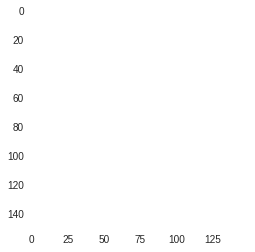

In [35]:
train_img_1=img_data_all[0,:].reshape(IMG_SIZE_FINAL,IMG_SIZE_FINAL,3) #for color (rows,cols,3)
plt.imshow(train_img_1,cmap='gray')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


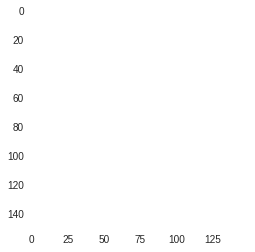

In [36]:


train_2D_img_1=img_2D_data_all[0,:] #for color (rows,cols,3)
plt.imshow(train_2D_img_1,cmap='gray')


In [37]:
img_data_all[0][10:40]

array([234., 234., 236., 236., 236., 238., 238., 238., 237., 237., 237.,
       237., 237., 237., 237., 237., 237., 236., 236., 236., 237., 237.,
       237., 238., 238., 238., 238., 238., 238., 238.], dtype=float32)

In [38]:
type(img_2D_data_all)

numpy.ndarray

In [0]:
from sklearn.utils import shuffle  
#train_img_data ,train_label = shuffle(img_data_all,label,random_state=10)  # img_data_all
train_img_data ,train_label = shuffle(img_2D_data_all,label,random_state=10)  # img_data_all


In [40]:
train_img_data.shape

(4838, 150, 150, 3)

In [0]:
from sklearn.model_selection import train_test_split

xtrain,xvalidate,ytrain,yvalidate = train_test_split(train_img_data,train_label,test_size=.2,random_state=4)
#flattened data needs to be reshape to image format for passing to convolution network
# we need to pass the no of samples and the image dimension 
x_train = xtrain.reshape(xtrain.shape[0],IMG_SIZE_FINAL,IMG_SIZE_FINAL,3)#,3 for color
x_validate = xvalidate.reshape(xvalidate.shape[0],IMG_SIZE_FINAL,IMG_SIZE_FINAL,3)#,3 for color
#conver to float


In [42]:
x_validate.shape

(968, 150, 150, 3)

In [0]:
x_validate_temp = x_validate * 255

In [0]:
#x_validate_temp = np.squeeze(x_validate_temp, axis=3)

In [45]:
x_validate_temp.shape

(968, 150, 150, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


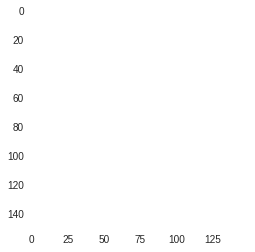

In [46]:
train_2D_img_1=x_validate_temp[1,:] #for color (rows,cols,3)
plt.imshow(train_2D_img_1,cmap='gray')

In [47]:
yvalidate[1]

'bowl'

In [0]:
x_train = x_train.astype('float32')
x_validate = x_validate.astype('float32')
#data needs to be normalized from 0 to 255 to 0 to 1
x_train = x_train/255
x_validate = x_validate/255

In [49]:
x_train.shape

(3870, 150, 150, 3)

In [50]:
ytrain

array(['office_chair', 'sofa', 'sofa', ..., 'office_chair', 'lamp',
       'sofa'], dtype='<U32')

In [51]:
pd.DataFrame(ytrain)[0].value_counts()

lamp             406
water_filter     396
office_chair     394
cooker           392
dinning_table    389
bowl             388
mirror           384
sofa             383
hot_pot          379
jug              359
Name: 0, dtype: int64

In [52]:
pd.DataFrame(yvalidate)[0].value_counts()

hot_pot          103
jug              103
water_filter      99
office_chair      99
sofa              98
mirror            97
lamp              96
cooker            95
dinning_table     89
bowl              89
Name: 0, dtype: int64

In [53]:
yvalidate

array(['bowl', 'bowl', 'cooker', 'cooker', 'mirror', 'hot_pot',
       'office_chair', 'jug', 'hot_pot', 'mirror', 'mirror', 'cooker',
       'hot_pot', 'mirror', 'office_chair', 'office_chair', 'jug',
       'hot_pot', 'jug', 'water_filter', 'sofa', 'hot_pot',
       'office_chair', 'lamp', 'water_filter', 'mirror', 'jug',
       'dinning_table', 'hot_pot', 'office_chair', 'mirror', 'jug',
       'lamp', 'mirror', 'office_chair', 'cooker', 'office_chair',
       'water_filter', 'dinning_table', 'mirror', 'mirror',
       'water_filter', 'jug', 'bowl', 'sofa', 'sofa', 'bowl', 'sofa',
       'water_filter', 'office_chair', 'bowl', 'lamp', 'cooker', 'sofa',
       'jug', 'lamp', 'sofa', 'bowl', 'lamp', 'mirror', 'water_filter',
       'hot_pot', 'jug', 'sofa', 'water_filter', 'cooker',
       'dinning_table', 'sofa', 'office_chair', 'dinning_table',
       'water_filter', 'water_filter', 'water_filter', 'lamp',
       'water_filter', 'lamp', 'mirror', 'office_chair', 'dinning_table',
   

In [54]:
ytrain

array(['office_chair', 'sofa', 'sofa', ..., 'office_chair', 'lamp',
       'sofa'], dtype='<U32')

In [0]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [56]:
label_encoder_train = LabelEncoder()
integer_encoded_ytrain = label_encoder_train.fit_transform(ytrain)
print(integer_encoded_ytrain)

[7 8 8 ... 7 5 8]


In [57]:
yvalidate[0]

'bowl'

In [0]:
integer_encoded_ytrain = integer_encoded_ytrain.reshape(len(integer_encoded_ytrain), 1)
# print(integer_encoded_ytrain)

In [0]:
onehot_encoder_ytrain = OneHotEncoder(sparse=False , categories='auto')
onehot_encoder_ytrain = onehot_encoder_ytrain.fit_transform(integer_encoded_ytrain)
#print(onehot_encoder_ytrain)

In [60]:
''' Can use OneHotEncoder directly, but inverse transformation do not work completely in that case which also needs LabelEncoder 
ytrain_reshape = ytrain.reshape(len(ytrain), 1)

onehot_encoder_ytrain = OneHotEncoder(sparse=False)
onehot_encoder_ytrain = onehot_encoder_ytrain.fit_transform(ytrain_reshape)
print(onehot_encoder_ytrain)

inverted_ytrain = argmax(onehot_encoder_ytrain[0,:])
#inverted_ytrain = label_encoder_train.inverse_transform([argmax(onehot_encoder_ytrain[0,:])])

'''

' Can use OneHotEncoder directly, but inverse transformation do not work completely in that case which also needs LabelEncoder \nytrain_reshape = ytrain.reshape(len(ytrain), 1)\n\nonehot_encoder_ytrain = OneHotEncoder(sparse=False)\nonehot_encoder_ytrain = onehot_encoder_ytrain.fit_transform(ytrain_reshape)\nprint(onehot_encoder_ytrain)\n\ninverted_ytrain = argmax(onehot_encoder_ytrain[0,:])\n#inverted_ytrain = label_encoder_train.inverse_transform([argmax(onehot_encoder_ytrain[0,:])])\n\n'

In [61]:
label_encoder_yvalidate = LabelEncoder()
integer_encoded_yvalidate = label_encoder_yvalidate.fit_transform(yvalidate)
#print(integer_encoded_yvalidate)

integer_encoded_yvalidate = integer_encoded_yvalidate.reshape(len(integer_encoded_yvalidate), 1)
# print(integer_encoded_yvalidaten)

onehot_encoder_yvalidate = OneHotEncoder(sparse=False , categories='auto')
onehot_encoder_yvalidate = onehot_encoder_yvalidate.fit_transform(integer_encoded_yvalidate)
print(onehot_encoder_yvalidate)

[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [62]:
print(integer_encoded_yvalidate[27]  , yvalidate)


[2] ['bowl' 'bowl' 'cooker' 'cooker' 'mirror' 'hot_pot' 'office_chair' 'jug'
 'hot_pot' 'mirror' 'mirror' 'cooker' 'hot_pot' 'mirror' 'office_chair'
 'office_chair' 'jug' 'hot_pot' 'jug' 'water_filter' 'sofa' 'hot_pot'
 'office_chair' 'lamp' 'water_filter' 'mirror' 'jug' 'dinning_table'
 'hot_pot' 'office_chair' 'mirror' 'jug' 'lamp' 'mirror' 'office_chair'
 'cooker' 'office_chair' 'water_filter' 'dinning_table' 'mirror' 'mirror'
 'water_filter' 'jug' 'bowl' 'sofa' 'sofa' 'bowl' 'sofa' 'water_filter'
 'office_chair' 'bowl' 'lamp' 'cooker' 'sofa' 'jug' 'lamp' 'sofa' 'bowl'
 'lamp' 'mirror' 'water_filter' 'hot_pot' 'jug' 'sofa' 'water_filter'
 'cooker' 'dinning_table' 'sofa' 'office_chair' 'dinning_table'
 'water_filter' 'water_filter' 'water_filter' 'lamp' 'water_filter' 'lamp'
 'mirror' 'office_chair' 'dinning_table' 'lamp' 'water_filter'
 'water_filter' 'office_chair' 'jug' 'office_chair' 'dinning_table'
 'water_filter' 'bowl' 'lamp' 'dinning_table' 'dinning_table' 'cooker'
 'office_c

In [63]:
from numpy import argmax
# invert first example
inverted_ytrain = label_encoder_train.inverse_transform([argmax(onehot_encoder_ytrain[1,:])])
print(inverted_ytrain)

['sofa']


In [0]:
y_train_EN=onehot_encoder_ytrain
y_validate_EN=onehot_encoder_yvalidate

In [65]:
x_train.shape

(3870, 150, 150, 3)

In [0]:
#train_2D_img_1=x_train[0,:] #for color (rows,cols,3)
#plt.imshow(train_2D_img_1,cmap='gray')

### Model hyperparameters 

In [0]:
V_EPOCH = 100
V_BATCH_SIZE = 5

In [108]:
x_train.shape , y_train_EN.shape

((3870, 150, 150, 3), (3870, 10))

In [0]:
#You cannot freeze a whole model after compilation and it's not freezed if it's not compiled

#If you set a flag model.trainable=False then while compiling keras sets all layers to be not trainable. 
#If you set this flag after compilation - then it will not affect your model at all. The same - if you set this flag before compiling and then you'll reuse a part of a model for compiling another one - it will not affect your reused layers. So model.trainable=False works only when you'll apply it in a following order:

# model definition
#model.trainable = False
#model.compile()

In [0]:
from keras.callbacks import EarlyStopping

In [111]:
import keras
from keras.models import Model

model_base = keras.applications.vgg16.VGG16(include_top=False, input_shape=(IMG_SIZE_FINAL,IMG_SIZE_FINAL,3), weights='imagenet')
output = model_base.output

output = Flatten()(output)

output = Dropout(0.2)(output)

output = Dense(10, activation='softmax', name='num_classes')(output)

# Add any other layers you want to `output` here...
#output = Dense(num_classes, activation='softmax')(output)
model = Model(model_base.input, output)
for layer in model_base.layers:
   layer.trainable = False
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0         
__________

In [0]:
early_stopping = EarlyStopping(monitor='val_acc', patience=10, verbose=1, mode='max')

In [115]:
history = model.fit(x_train,y_train_EN,validation_data=(x_validate,y_validate_EN),epochs=V_EPOCH,batch_size=V_BATCH_SIZE,verbose=1, callbacks=[early_stopping])
#history = model.fit(x_train,y_train_EN,validation_data=(x_validate,y_validate_EN),epochs=V_EPOCH,batch_size=V_BATCH_SIZE,verbose=1)

Train on 3870 samples, validate on 968 samples
Epoch 1/100
3870/3870 [==============================] - 49s 13ms/step - loss: 0.0178 - acc: 0.9956 - val_loss: 0.8806 - val_acc: 0.8946
Epoch 2/100
3870/3870 [==============================] - 49s 13ms/step - loss: 0.0091 - acc: 0.9974 - val_loss: 0.9307 - val_acc: 0.8946
Epoch 3/100
3870/3870 [==============================] - 50s 13ms/step - loss: 0.0058 - acc: 0.9984 - val_loss: 1.0116 - val_acc: 0.8843
Epoch 4/100
3870/3870 [==============================] - 49s 13ms/step - loss: 0.0196 - acc: 0.9953 - val_loss: 0.9212 - val_acc: 0.8915
Epoch 5/100
3870/3870 [==============================] - 49s 13ms/step - loss: 0.0063 - acc: 0.9987 - val_loss: 0.8577 - val_acc: 0.8977
Epoch 6/100
3870/3870 [==============================] - 49s 13ms/step - loss: 0.0042 - acc: 0.9990 - val_loss: 0.9747 - val_acc: 0.8905
Epoch 7/100
3870/3870 [==============================] - 49s 13ms/step - loss: 0.0179 - acc: 0.9964 - val_loss: 0.9703 - val_acc: 0

In [117]:
results = model.evaluate(x_validate,y_validate_EN)

968/968 [==============================] - 5s 5ms/step


In [118]:
print("Test Loss and Accuracy")
print("results ", results)
history_dict = history.history
history_dict.keys()

Test Loss and Accuracy
results  [0.8791144552663708, 0.8966942148760331]


dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

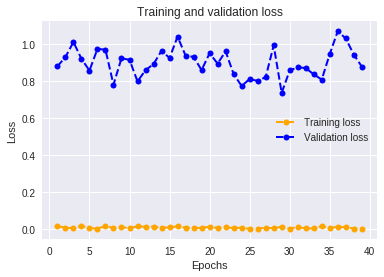

In [119]:
# VALIDATION LOSS curves
import matplotlib.pyplot as plt

plt.clf()
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, (len(history_dict['loss']) + 1))
plt.plot(epochs, loss_values, color='orange', marker='o', linestyle='dashed', linewidth=2, markersize=6,label='Training loss')
plt.plot(epochs, val_loss_values, color='blue', marker='o', linestyle='dashed', linewidth=2, markersize=6,label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

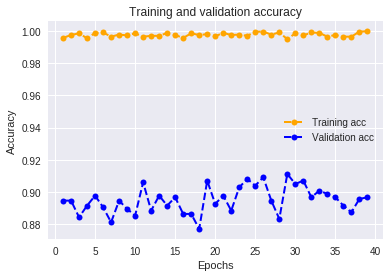

In [120]:
# VALIDATION ACCURACY curves

plt.clf()
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
epochs = range(1, (len(history_dict['acc']) + 1))
plt.plot(epochs, acc_values, color='orange', marker='o', linestyle='dashed', linewidth=2, markersize=6, label='Training acc')
plt.plot(epochs, val_acc_values, color='blue', marker='o', linestyle='dashed', linewidth=2, markersize=6, label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [151]:
print(model.metrics_names)

['loss', 'acc']


In [152]:
acc = model.evaluate(x_validate,y_validate_EN)
print(acc)

968/968 [==============================] - 5s 5ms/step
[0.8791144552663708, 0.8966942148760331]


In [153]:
x_validate[0][100][100]*255

array([10., 10., 10.], dtype=float32)

In [0]:
x_validate_full = x_validate * 255

In [155]:
x_validate_full.shape

(968, 150, 150, 3)

In [0]:
#x_validate_full_flat = np.squeeze(x_validate_full, axis=3)

In [0]:
#x_validate_full_flat.shape

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


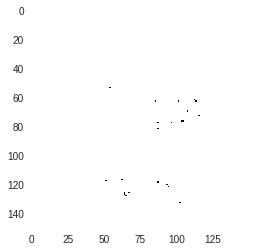

In [158]:
train_2D_img_1=x_validate_full[6,:,:] #for color (rows,cols,3)
plt.imshow(train_2D_img_1)

In [159]:
yvalidate[6]

'office_chair'

In [160]:
y_validate_EN[6]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

In [161]:
y_predict = model.predict(x_validate)
y_predict

array([[1.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 2.98913758e-17, 1.21857747e-32, ...,
        5.19139961e-37, 0.00000000e+00, 1.15304229e-35],
       [1.98679065e-28, 1.00000000e+00, 2.23135100e-25, ...,
        2.41030511e-37, 0.00000000e+00, 1.03034762e-29],
       ...,
       [2.37577646e-18, 5.29358938e-22, 1.48727171e-20, ...,
        1.08223715e-20, 4.19391589e-24, 6.55972631e-19],
       [5.59981080e-22, 5.96934743e-35, 2.04017241e-25, ...,
        1.00000000e+00, 3.68339468e-19, 1.18109485e-32],
       [9.31664944e-01, 7.73415535e-15, 5.73409743e-20, ...,
        6.60438837e-20, 1.51514596e-15, 8.32789931e-19]], dtype=float32)

In [162]:
y_predict[6]

array([0.0000000e+00, 2.2441405e-38, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 2.9106328e-38, 0.0000000e+00, 1.0000000e+00,
       0.0000000e+00, 0.0000000e+00], dtype=float32)

In [163]:
y_pred = []

for val in y_predict:
    y_pred.append(np.argmax(val))
    
print(y_pred)  
print(y_validate_EN)
print(yvalidate)



[0, 0, 1, 1, 6, 3, 7, 4, 3, 6, 6, 1, 3, 6, 7, 7, 4, 3, 4, 9, 8, 3, 7, 5, 9, 6, 4, 2, 3, 7, 6, 4, 5, 6, 7, 3, 7, 9, 2, 6, 6, 9, 4, 0, 8, 8, 0, 0, 9, 7, 0, 5, 1, 0, 4, 5, 8, 0, 5, 6, 9, 3, 4, 8, 9, 1, 2, 8, 7, 2, 9, 9, 9, 5, 9, 5, 6, 7, 2, 5, 9, 9, 7, 4, 7, 2, 9, 0, 0, 8, 2, 0, 7, 4, 3, 9, 5, 4, 0, 5, 3, 7, 0, 4, 4, 8, 9, 2, 4, 7, 0, 8, 5, 8, 7, 8, 3, 0, 6, 8, 8, 3, 7, 9, 8, 3, 8, 1, 8, 5, 6, 3, 7, 1, 0, 1, 7, 7, 4, 3, 5, 7, 9, 0, 9, 6, 6, 8, 7, 7, 9, 6, 5, 0, 2, 6, 6, 5, 4, 1, 9, 1, 6, 8, 8, 5, 6, 7, 9, 9, 5, 4, 5, 5, 9, 4, 7, 6, 6, 6, 2, 7, 2, 6, 7, 2, 2, 0, 1, 4, 1, 0, 0, 8, 3, 2, 6, 4, 6, 3, 4, 9, 0, 1, 3, 4, 7, 0, 8, 0, 2, 8, 9, 9, 1, 2, 9, 5, 8, 9, 7, 5, 9, 4, 3, 0, 2, 2, 7, 9, 2, 3, 7, 9, 9, 5, 4, 6, 7, 2, 7, 2, 3, 9, 8, 2, 9, 2, 9, 6, 2, 0, 4, 7, 8, 9, 8, 7, 1, 8, 9, 9, 2, 1, 9, 0, 7, 8, 7, 8, 4, 4, 0, 0, 6, 5, 2, 1, 5, 2, 0, 0, 3, 1, 3, 2, 6, 3, 6, 7, 7, 6, 3, 2, 6, 6, 8, 5, 6, 3, 6, 1, 9, 0, 8, 4, 2, 3, 3, 2, 1, 3, 3, 5, 6, 4, 5, 7, 5, 5, 3, 0, 7, 4, 0, 5, 2, 3, 3, 6, 3, 0, 3, 

In [164]:
yvalidate

array(['bowl', 'bowl', 'cooker', 'cooker', 'mirror', 'hot_pot',
       'office_chair', 'jug', 'hot_pot', 'mirror', 'mirror', 'cooker',
       'hot_pot', 'mirror', 'office_chair', 'office_chair', 'jug',
       'hot_pot', 'jug', 'water_filter', 'sofa', 'hot_pot',
       'office_chair', 'lamp', 'water_filter', 'mirror', 'jug',
       'dinning_table', 'hot_pot', 'office_chair', 'mirror', 'jug',
       'lamp', 'mirror', 'office_chair', 'cooker', 'office_chair',
       'water_filter', 'dinning_table', 'mirror', 'mirror',
       'water_filter', 'jug', 'bowl', 'sofa', 'sofa', 'bowl', 'sofa',
       'water_filter', 'office_chair', 'bowl', 'lamp', 'cooker', 'sofa',
       'jug', 'lamp', 'sofa', 'bowl', 'lamp', 'mirror', 'water_filter',
       'hot_pot', 'jug', 'sofa', 'water_filter', 'cooker',
       'dinning_table', 'sofa', 'office_chair', 'dinning_table',
       'water_filter', 'water_filter', 'water_filter', 'lamp',
       'water_filter', 'lamp', 'mirror', 'office_chair', 'dinning_table',
   

In [0]:
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_curve

In [201]:
y_new = LabelEncoder()
encoded_yvalidate = y_new.fit_transform(yvalidate)
print(encoded_yvalidate)
    


[0 0 1 1 6 3 7 4 3 6 6 1 3 6 7 7 4 3 4 9 8 3 7 5 9 6 4 2 3 7 6 4 5 6 7 1 7
 9 2 6 6 9 4 0 8 8 0 8 9 7 0 5 1 8 4 5 8 0 5 6 9 3 4 8 9 1 2 8 7 2 9 9 9 5
 9 5 6 7 2 5 9 9 7 4 7 2 9 0 5 2 2 1 7 4 0 9 5 4 0 5 3 7 0 4 4 8 9 2 4 7 0
 8 5 8 7 5 3 0 6 8 8 3 7 9 8 3 8 1 8 5 6 3 7 1 0 1 7 7 4 3 5 7 9 0 9 6 6 8
 7 7 9 6 5 6 2 6 6 2 4 1 9 5 6 8 8 5 6 7 9 9 5 4 5 5 9 4 7 6 6 6 2 7 2 5 7
 2 2 0 1 4 1 5 3 8 3 2 6 4 6 4 4 9 0 1 3 4 7 0 8 4 2 8 9 9 1 2 9 5 8 9 7 5
 5 4 3 3 2 2 7 9 2 3 7 9 9 5 4 6 7 8 7 2 3 9 8 2 9 2 5 6 2 0 4 7 8 9 8 7 1
 8 9 9 2 4 9 0 7 8 7 8 4 4 0 0 5 5 2 1 5 8 4 0 3 1 3 2 5 0 3 7 7 6 3 2 6 6
 8 5 6 3 6 1 4 0 8 4 2 3 3 2 1 3 3 5 5 4 5 7 5 5 3 0 7 4 0 6 2 3 3 6 3 0 0
 3 3 6 4 5 7 1 5 2 3 7 0 5 2 4 1 1 7 0 3 2 9 3 1 1 1 3 6 1 5 5 5 1 8 1 4 4
 1 5 1 3 2 1 5 4 9 0 3 0 9 3 9 8 1 2 6 8 6 0 9 5 3 8 5 8 5 2 1 4 0 8 4 4 3
 1 6 4 2 9 1 9 1 6 8 2 4 6 9 8 0 1 5 7 1 9 7 2 0 8 5 0 9 6 0 1 3 8 2 8 4 0
 0 8 1 6 3 5 6 4 4 6 1 6 8 9 4 3 3 5 7 1 5 5 2 6 3 3 8 3 0 0 6 7 3 3 2 8 8
 9 6 1 5 6 1 1 7 9 1 9 9 

In [215]:
y_predict = model.predict(x_validate)
y_pred = []
for val in y_predict:
    y_pred.append(np.argmax(val))
print(y_pred)    
cr = metrics.classification_report(encoded_yvalidate,y_pred)
print(cr)
#convert 0 1 to 1 and 1 0 as 0
cm = metrics.confusion_matrix(encoded_yvalidate,y_pred)
print(cm)

[0, 0, 1, 1, 6, 3, 7, 4, 3, 6, 6, 1, 3, 6, 7, 7, 4, 3, 4, 9, 8, 3, 7, 5, 9, 6, 4, 2, 3, 7, 6, 4, 5, 6, 7, 3, 7, 9, 2, 6, 6, 9, 4, 0, 8, 8, 0, 0, 9, 7, 0, 5, 1, 0, 4, 5, 8, 0, 5, 6, 9, 3, 4, 8, 9, 1, 2, 8, 7, 2, 9, 9, 9, 5, 9, 5, 6, 7, 2, 5, 9, 9, 7, 4, 7, 2, 9, 0, 0, 8, 2, 0, 7, 4, 3, 9, 5, 4, 0, 5, 3, 7, 0, 4, 4, 8, 9, 2, 4, 7, 0, 8, 5, 8, 7, 8, 3, 0, 6, 8, 8, 3, 7, 9, 8, 3, 8, 1, 8, 5, 6, 3, 7, 1, 0, 1, 7, 7, 4, 3, 5, 7, 9, 0, 9, 6, 6, 8, 7, 7, 9, 6, 5, 0, 2, 6, 6, 5, 4, 1, 9, 1, 6, 8, 8, 5, 6, 7, 9, 9, 5, 4, 5, 5, 9, 4, 7, 6, 6, 6, 2, 7, 2, 6, 7, 2, 2, 0, 1, 4, 1, 0, 0, 8, 3, 2, 6, 4, 6, 3, 4, 9, 0, 1, 3, 4, 7, 0, 8, 0, 2, 8, 9, 9, 1, 2, 9, 5, 8, 9, 7, 5, 9, 4, 3, 0, 2, 2, 7, 9, 2, 3, 7, 9, 9, 5, 4, 6, 7, 2, 7, 2, 3, 9, 8, 2, 9, 2, 9, 6, 2, 0, 4, 7, 8, 9, 8, 7, 1, 8, 9, 9, 2, 1, 9, 0, 7, 8, 7, 8, 4, 4, 0, 0, 6, 5, 2, 1, 5, 2, 0, 0, 3, 1, 3, 2, 6, 3, 6, 7, 7, 6, 3, 2, 6, 6, 8, 5, 6, 3, 6, 1, 9, 0, 8, 4, 2, 3, 3, 2, 1, 3, 3, 5, 6, 4, 5, 7, 5, 5, 3, 0, 7, 4, 0, 5, 2, 3, 3, 6, 3, 0, 3, 

In [0]:
from keras.models import load_model

model.save('/content/drive/My Drive/Colab Notebooks/vgg16_final.h5')  # creates a HDF5 file 'my_model.h5'


